In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import re # Regular expression matching
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os, glob, pickle, gc
import math

mpl.rcParams['figure.figsize'] = (13,9)
mpl.rcParams['font.size'] = 30


In [3]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [4]:
# Plot area sizes...
left, width = 0.125, 0.7
bottom, height = 0.1, 0.85

plot_area = [left, bottom, width, height]

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5,.5,.5,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [5]:
dotNorm = 10.0  # For dot-size scaling

In [6]:
# z=16.0;sbox =  5.0 / (1.0 + z) * 0.71
# i=770
# print ("z=%.1lf, sbox=%.2lf"%(z,sbox))
# ymax = 10**5.2

z=8.0;sbox =  20.0 / (1.0 + z) * 0.71 # Not needed, info only
i=265793
print ("z=%.1lf, sbox=%.2lf"%(z,sbox))
ymax = 10**6

###
###
###
x,y,zz = np.loadtxt("z%05.2f_SpCoord_%d.txt"%(z,i))
locs = np.loadtxt("spLocHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) - np.array([x,y,zz]) # Normalize
mass = np.loadtxt("spMassHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)
Z    = np.loadtxt("spZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPFHaloOnly_%05.2f_%d_40kpc.txt"%(z,i),skiprows=1)

fpol = (1-PPF)
fpol[fpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
Zf=Z/fpol # This is our Z corrected for f_pol
Zf[np.isinf(Zf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
Zf[np.isnan(Zf)] = 10**-7.5
Zf[Zf<1e-5] = 10**-7.5

Z[Z<1e-5] = 10**-7.5

PZf=PZ/fpol
PZf[np.isinf(PZf)] = 10**-7.5
PZf[np.isnan(PZf)] = 10**-7.5

PZ[PZ<1e-5] = 10**-7.5

# Pick out stars by metallicity range... 
rng1 = (Z < 1.e-5)
rng2 = ((Z >= 1.e-5) & (Z < 1.e-3))
rng3 = ((Z >= 1.e-3) & (Z < 1.e-1))
rng4 = (Z >= 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (Zf < 1.e-5)
rngf2 = ((Zf >= 1.e-5) & (Zf < 1.e-3))
rngf3 = ((Zf >= 1.e-3) & (Zf < 1.e-1))
rngf4 = (Zf >= 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (PPF < 1.e-5)
pfrng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
pfrng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
pfrng4 = (PPF >= 1.e-1)

pzrng1 = (PZ < 1.e-5)
pzrng2 = ((PZ >= 1.e-5) & (PZ < 1.e-3))
pzrng3 = ((PZ >= 1.e-3) & (PZ < 1.e-1))
pzrng4 = (PZ >= 1.e-1)

pzrngf1 = (PZf < 1.e-5)
pzrngf2 = ((PZf >= 1.e-5) & (PZf < 1.e-3))
pzrngf3 = ((PZf >= 1.e-3) & (PZf < 1.e-1))
pzrngf4 = (PZf >= 1.e-1)
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

zf1=np.log10(Zf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(Zf[rngf2])
zf3=np.log10(Zf[rngf3])
zf4=np.log10(Zf[rngf4])

pf1=np.log10(PPF[pfrng1])
pf2=np.log10(PPF[pfrng2])
pf3=np.log10(PPF[pfrng3])
pf4=np.log10(PPF[pfrng4])

pz1=np.log10(PZ[pzrng1])
pz2=np.log10(PZ[pzrng2])
pz3=np.log10(PZ[pzrng3])
pz4=np.log10(PZ[pzrng4])

pzf1=np.log10(PZf[pzrngf1])
pzf2=np.log10(PZf[pzrngf2])
pzf3=np.log10(PZf[pzrngf3])
pzf4=np.log10(PZf[pzrngf4])

z=8.0, sbox=1.58


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in true_divide
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:75: RuntimeWarning: divide by zero encountered in log10


In [7]:
np.sum(mass),np.sum(mass[pzrngf1])+np.sum(mass[pzrngf1])+np.sum(mass[pzrngf1])+np.sum(mass[pzrngf1])

(1453440.1116387094, 1767540.5484561273)

# Compute histogram for the halo

In [8]:
axLabelSize=34

In [9]:
# Slightly offset bins so we can see the data.
# 51 Z bins from -10 to 0
numBins=52
minB=-5.1;maxB=0
xrange1 = np.logspace(minB,maxB,numBins) # 1e-10, 1e-9.8, 1e-9.6, ... 
xrange2 = np.logspace(minB+.02,maxB+0.02,numBins) # 1e-9.96, 1e-9.76, 1e-9.56, ... 
xrange3 = np.logspace(minB+.04,maxB+0.04,numBins) # 1e-9.92, 1e-9.72, 1e-9.52, ... 
xrange4 = np.logspace(minB+.06,maxB+0.06,numBins) # 1e-9.92, 1e-9.72, 1e-9.52, ... 

In [10]:
# Use uncorrected Z for bins
# Make these points closer to -7
Z[Z<1e-5] = 10**-5.001
# Zf[Zf<1e-5] = 1e-7
# PZ[PZ<1e-5] = 1e-7

# Reset PZ < Z_crit to 0 so we don't end up with 1e-8/1e-8 = 1 for primordial metals... 
temp = PZ
temp[temp < 1e-5] = 0.0

bins    = np.logspace(minB, maxB, numBins) # Log bins for histogram data 
psm     = np.zeros(numBins-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(numBins-1) # total mass
zsm     = np.zeros(numBins-1) # total polluted mass
primsm  = np.zeros(numBins-1) # Primordial stellar mass
for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        theBin = (Z >= j) & (Z < bins[indx2+1]) # Bin the particles in <Z>

        tsm[indx2] = np.sum(mass[theBin]) # Total mass for sp's with <Z> in bin
        psm[indx2] = np.sum(PPF[theBin] * mass[theBin]) # Pop III mass in bin
        # For sp's that are in our bin:
        #   Compute the polluted fraction * pristine metals fraction: f_pol * Z_P/Z
        #   Compute the mass of stars that are polluted only by pristine metals
        # Remember, we're only looking at stars in the bin, bin_lower < Z < bin_upper
        primsm[indx2] = np.sum(fpol[theBin] * (temp[theBin] / Z[theBin]) * mass[theBin]) 
        zsm[indx2]    = np.sum(fpol[theBin] * mass[theBin]) # Mass of stars that are polluted and have <Z> in bin

In [11]:
print("Total Pop III stellar mass=",np.sum(psm))
print("Total Pop III mass =",np.sum(mass) - np.sum(mass * fpol))

Total Pop III stellar mass= 618748.716773
Total Pop III mass = 618748.716773


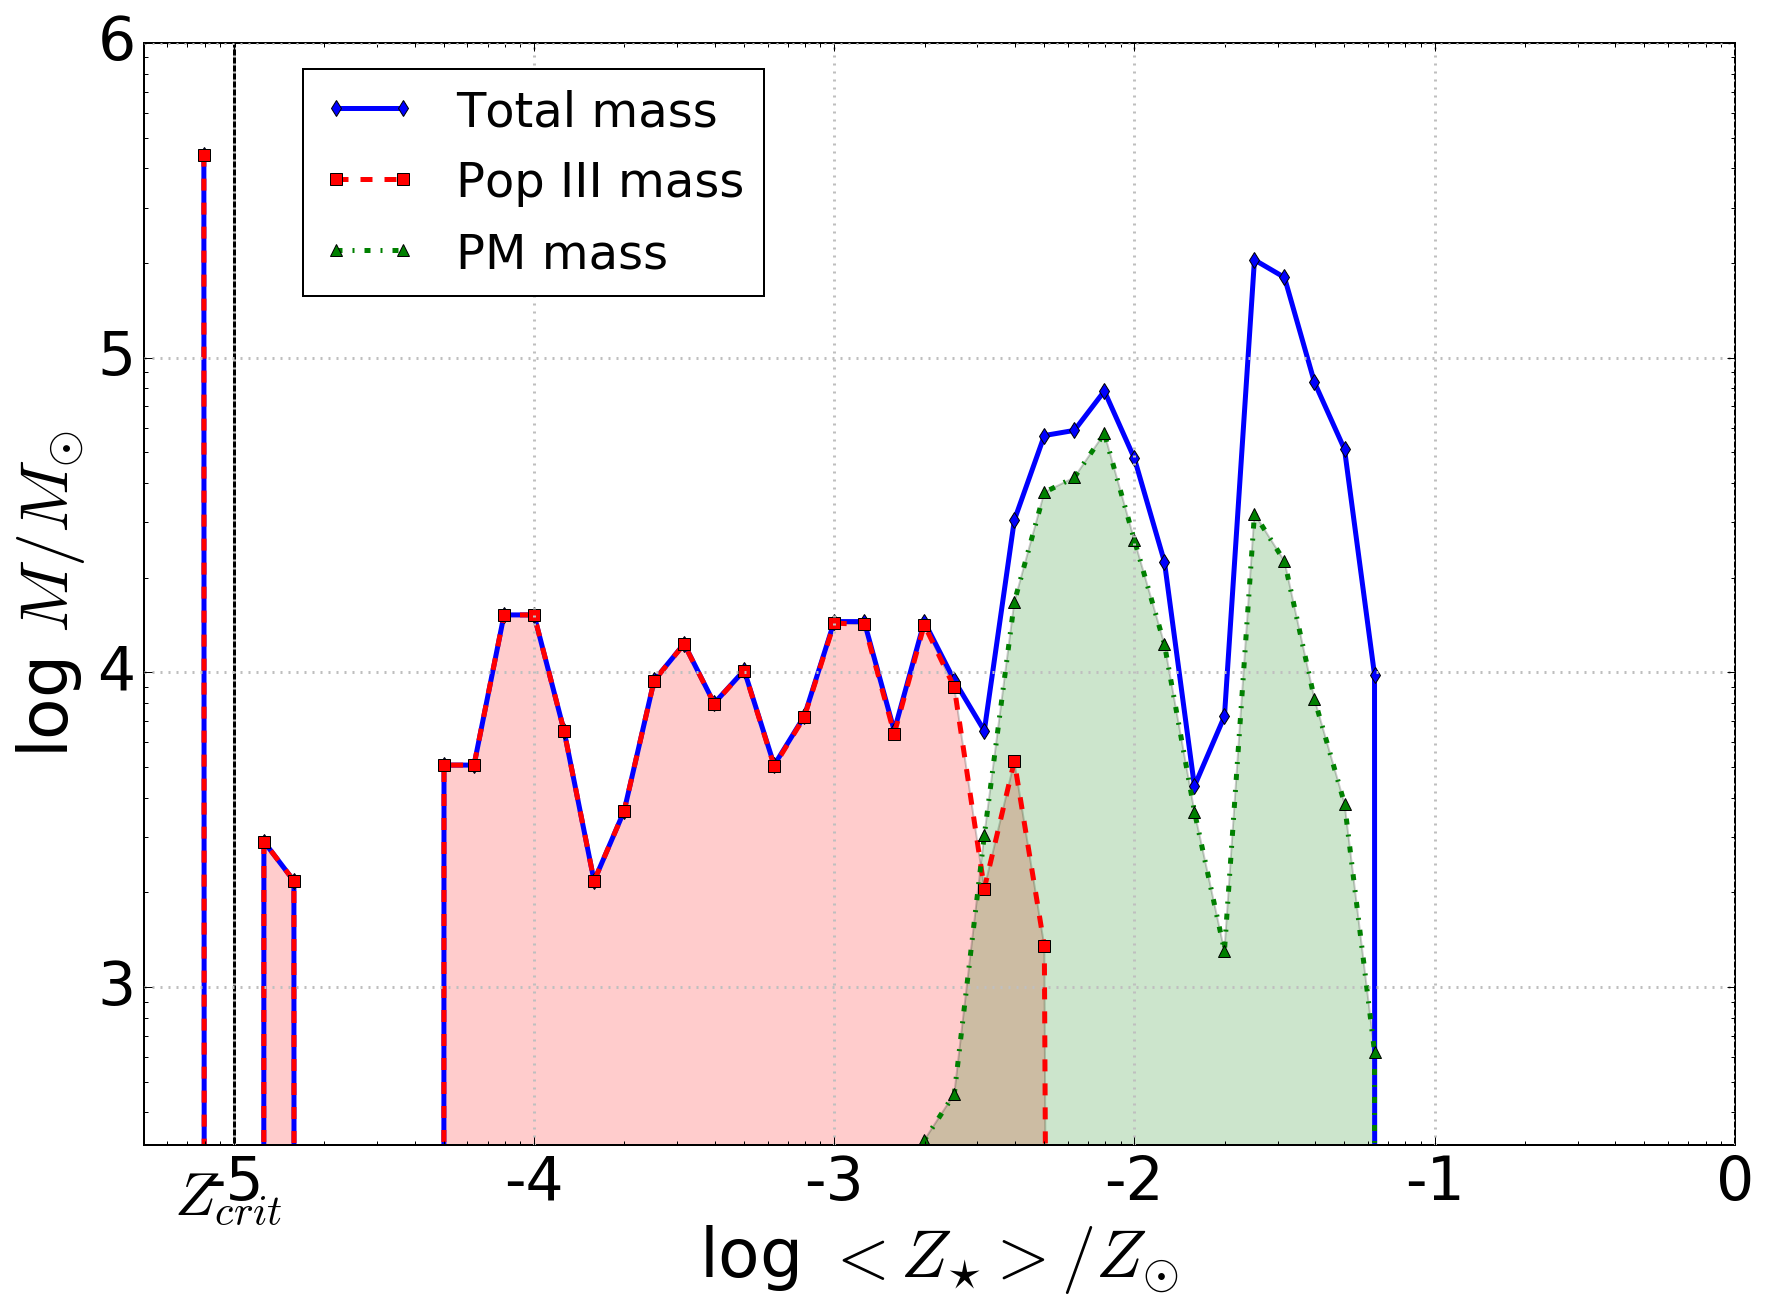

In [12]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (13,11)
#plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([5*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $<Z_{\star}> /Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M/M_{\odot}$', size=axLabelSize)

axHist.plot(xrange1[0:numBins-1],tsm,'b-d',  linewidth = 2.5)
axHist.plot(xrange1[0:numBins-1],psm, 'r--s', linewidth = 2.5 )
axHist.plot(xrange1[0:numBins-1],primsm,'g-.^', linewidth = 2.5 )
# axHist.plot(xrange1[0:numBins-1],zsm,'c-.o', linewidth = 2.5 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange1[0:numBins-1], 0, psm, facecolor='r', alpha=0.2)
axHist.fill_between(xrange1[0:numBins-1], 0, primsm, facecolor='g', alpha=0.2)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate("$Z_{crit}$",
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.77), fontsize=24 )
#plt.savefig("Hist_HaloData_z={:04.1f}SFRegion.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [13]:
tsm2 = np.empty((2*(tsm.size)), dtype=tsm.dtype)
tsm2[0::2] = tsm 
tsm2[1::2] = tsm
psm2 = np.empty((2*(psm.size)), dtype=psm.dtype)
psm2[0::2] = psm 
psm2[1::2] = psm
primsm2 = np.empty((2*(primsm.size)), dtype=primsm.dtype)
primsm2[0::2] = primsm 
primsm2[1::2] = primsm

In [14]:
newx = np.empty((2*(xrange1.size - 1)), dtype=xrange1.dtype)
newx[0::2] = xrange1[0:numBins-1]
newx[1::2] = xrange1[1:numBins]
print(newx.size)

102


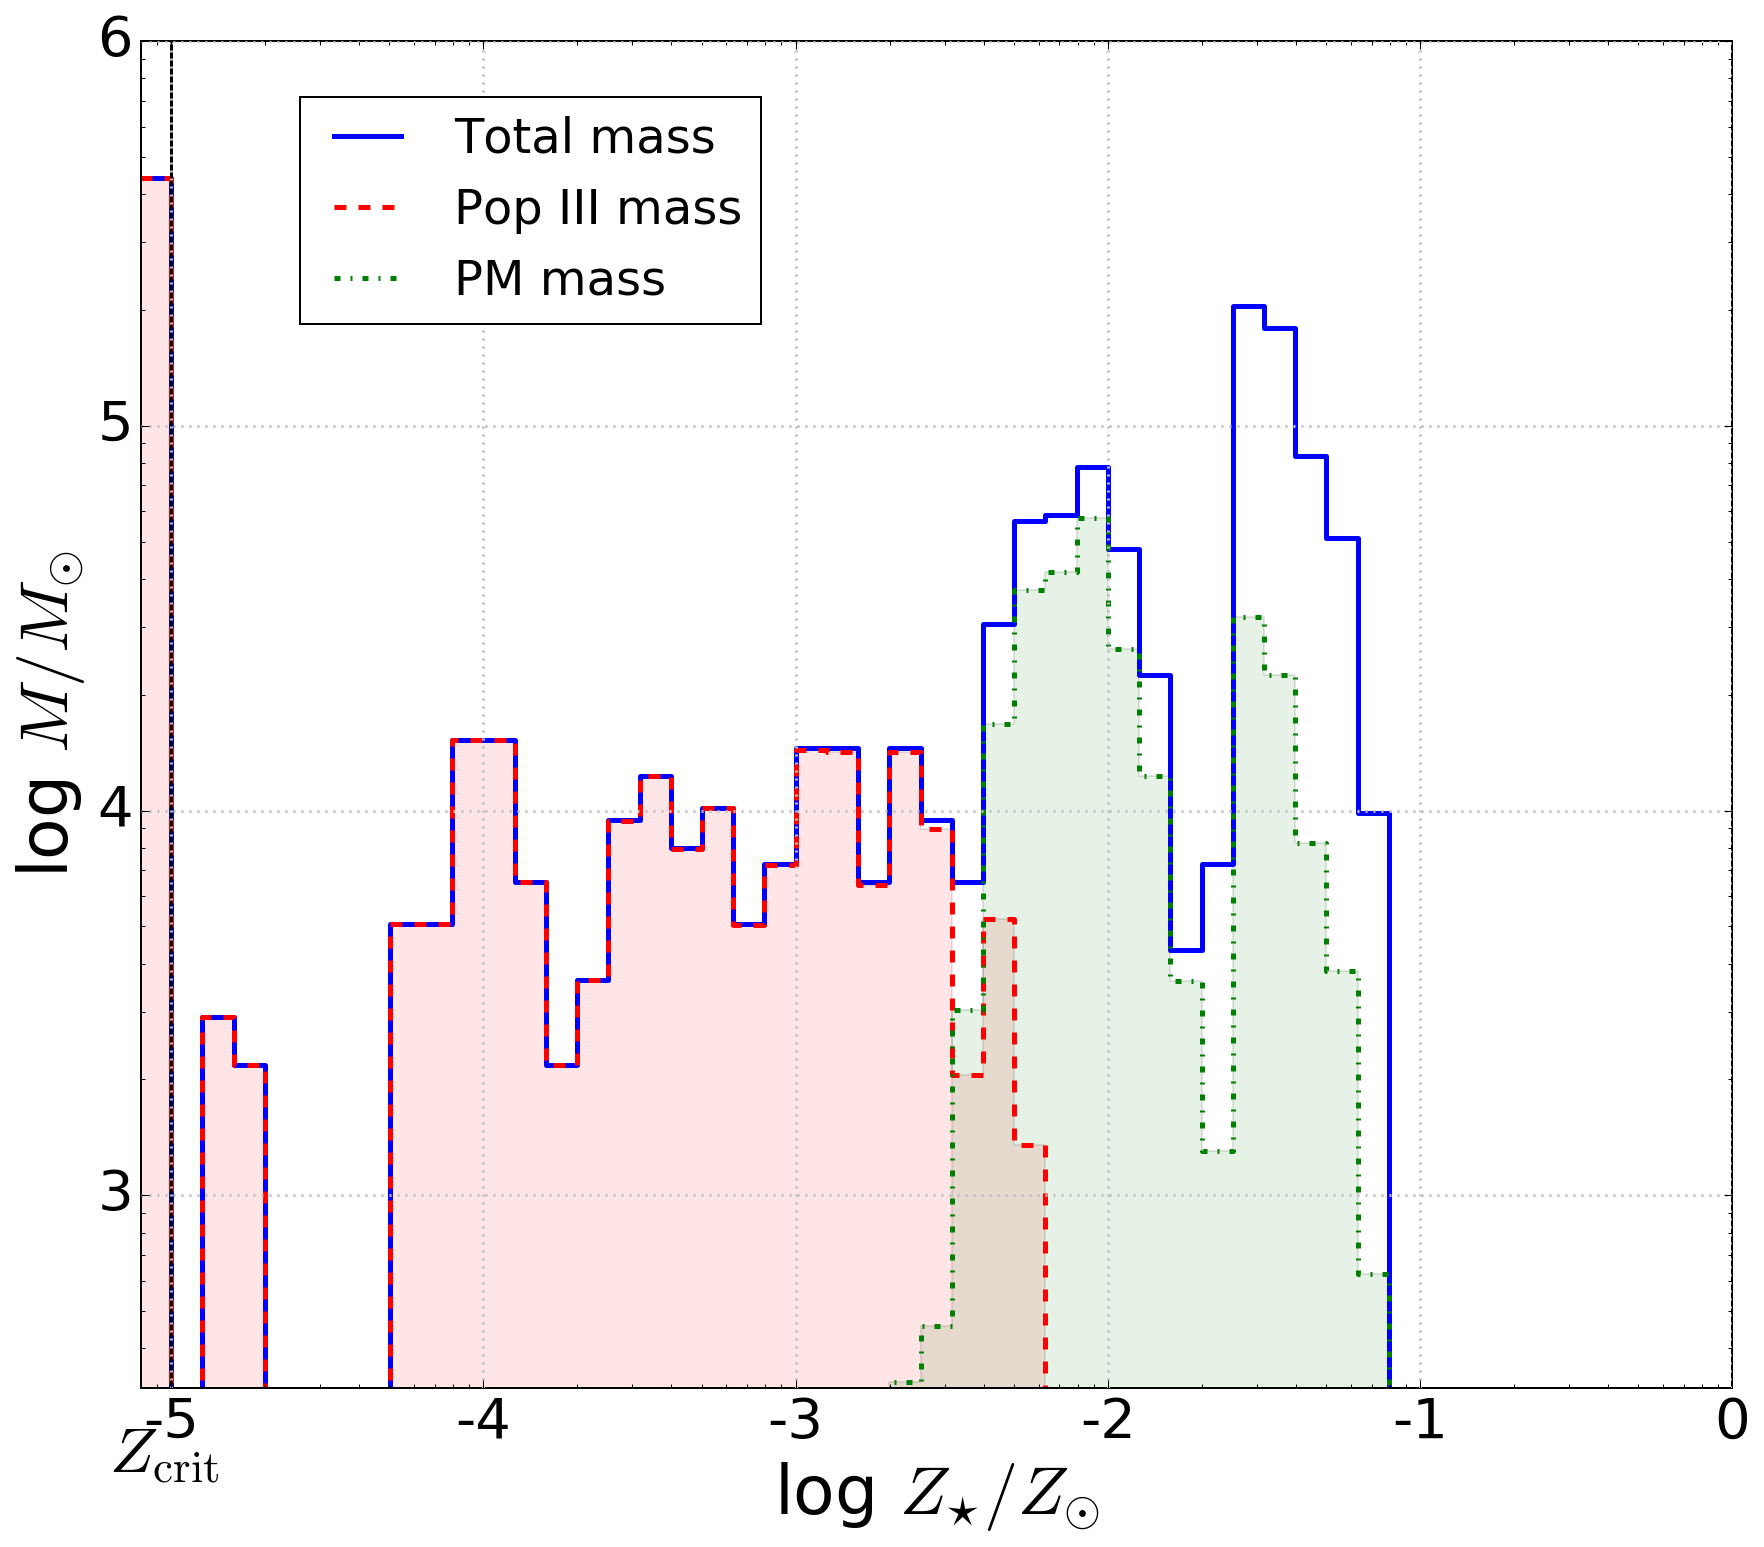

In [15]:
# With blocky transitions
 

fig = plt.figure()
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([8*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M/M_{\odot}$', size=axLabelSize)

axHist.plot(newx,tsm2,'b-',  linewidth = 2.5)
axHist.plot(newx,psm2, 'r--', linewidth = 2.5 )
axHist.plot(newx,primsm2,'g-.', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(newx, 0, psm2, facecolor='r', alpha=0.1)
axHist.fill_between(newx, 0, primsm2, facecolor='g', alpha=0.1)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate(r"$Z_{\rm crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.79), fontsize=24 )
plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_20kpc.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [16]:
# Use CORRECTED Z for bins
# Make these points closer to -7
Z[Z<1e-5] = 10**-5.001
Zf[Zf<1e-5] = 10**-5.001
PZ[PZ<1e-5] = 10**-5.001

# Reset PZ < Z_crit to 0 so we don't end up with 1e-8/1e-8 = 1 for primordial metals... 
temp = PZ
temp[temp < 1e-5] = 0.0

bins    = np.logspace(minB, maxB, numBins) # Log bins for histogram data 
psm     = np.zeros(numBins-1) # Pristine Stellar mass in that bin
tsm     = np.zeros(numBins-1) # total mass
zsm     = np.zeros(numBins-1) # total polluted mass
primsm  = np.zeros(numBins-1) # Primordial stellar mass
for indx2,j in enumerate(bins):
    if indx2 < len(bins)-1:
        theBin = (Zf >= j) & (Zf < bins[indx2+1]) # This selects for sp's in the bin that have Z/f_pol

        tsm[indx2] = np.sum(mass[theBin])
        psm[indx2] = np.sum(PPF[theBin] * mass[theBin])
        # For sp's that are in our bin:
        #   Compute the polluted fraction * pristine metals fraction: f_pol * pzf/Z
        #   Compute the mass of stars that are polluted only by pristine metals
        primsm[indx2] = np.sum(fpol[theBin] * (temp[theBin] / Z[theBin]) * mass[theBin])
        zsm[indx2]    = np.sum(fpol[theBin] * mass[theBin])

In [17]:
print("Total polluted stellar mass=",np.sum(psm))

Total polluted stellar mass= 618748.716773


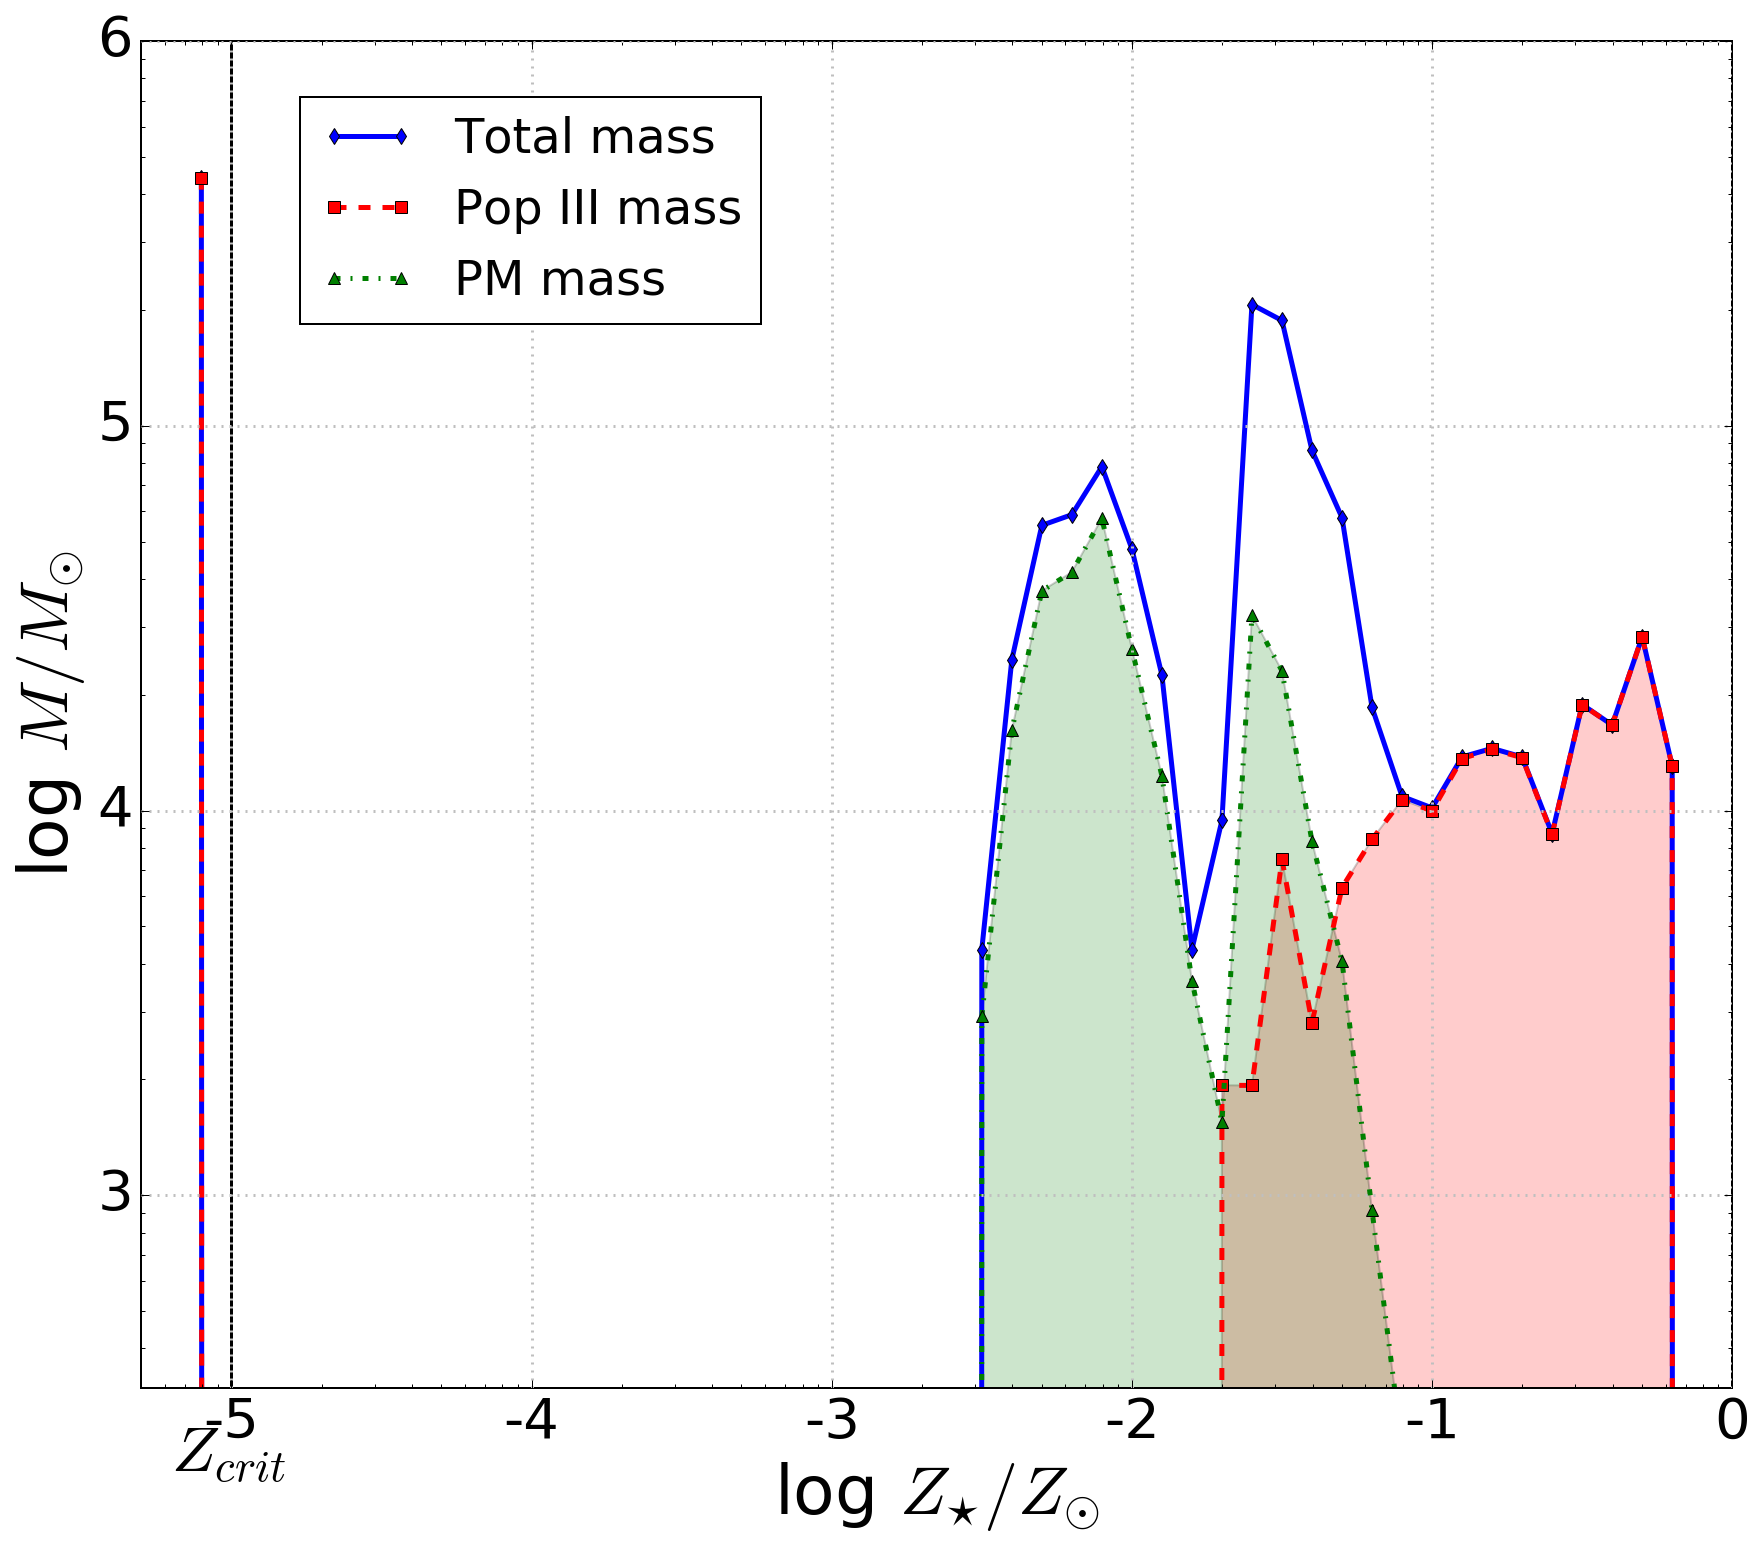

In [18]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([5*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M/M_{\odot}$', size=axLabelSize)

axHist.plot(xrange1[0:numBins-1],tsm,'b-d',  linewidth = 2.5)
axHist.plot(xrange1[0:numBins-1],psm, 'r--s', linewidth = 2.5 )
axHist.plot(xrange1[0:numBins-1],primsm,'g-.^', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(xrange1[0:numBins-1], 0, psm, facecolor='r', alpha=0.2)
axHist.fill_between(xrange1[0:numBins-1], 0, primsm, facecolor='g', alpha=0.2)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate("$Z_{crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.79), fontsize=24 )
#plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_fpol.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [19]:
tsm2 = np.empty((2*(tsm.size)), dtype=tsm.dtype)
tsm2[0::2] = tsm 
tsm2[1::2] = tsm
psm2 = np.empty((2*(psm.size)), dtype=psm.dtype)
psm2[0::2] = psm 
psm2[1::2] = psm
primsm2 = np.empty((2*(primsm.size)), dtype=primsm.dtype)
primsm2[0::2] = primsm 
primsm2[1::2] = primsm

In [20]:
newx = np.empty((2*(xrange1.size - 1)), dtype=xrange1.dtype)
newx[0::2] = xrange1[0:numBins-1]
newx[1::2] = xrange1[1:numBins]
print(newx.size)

102


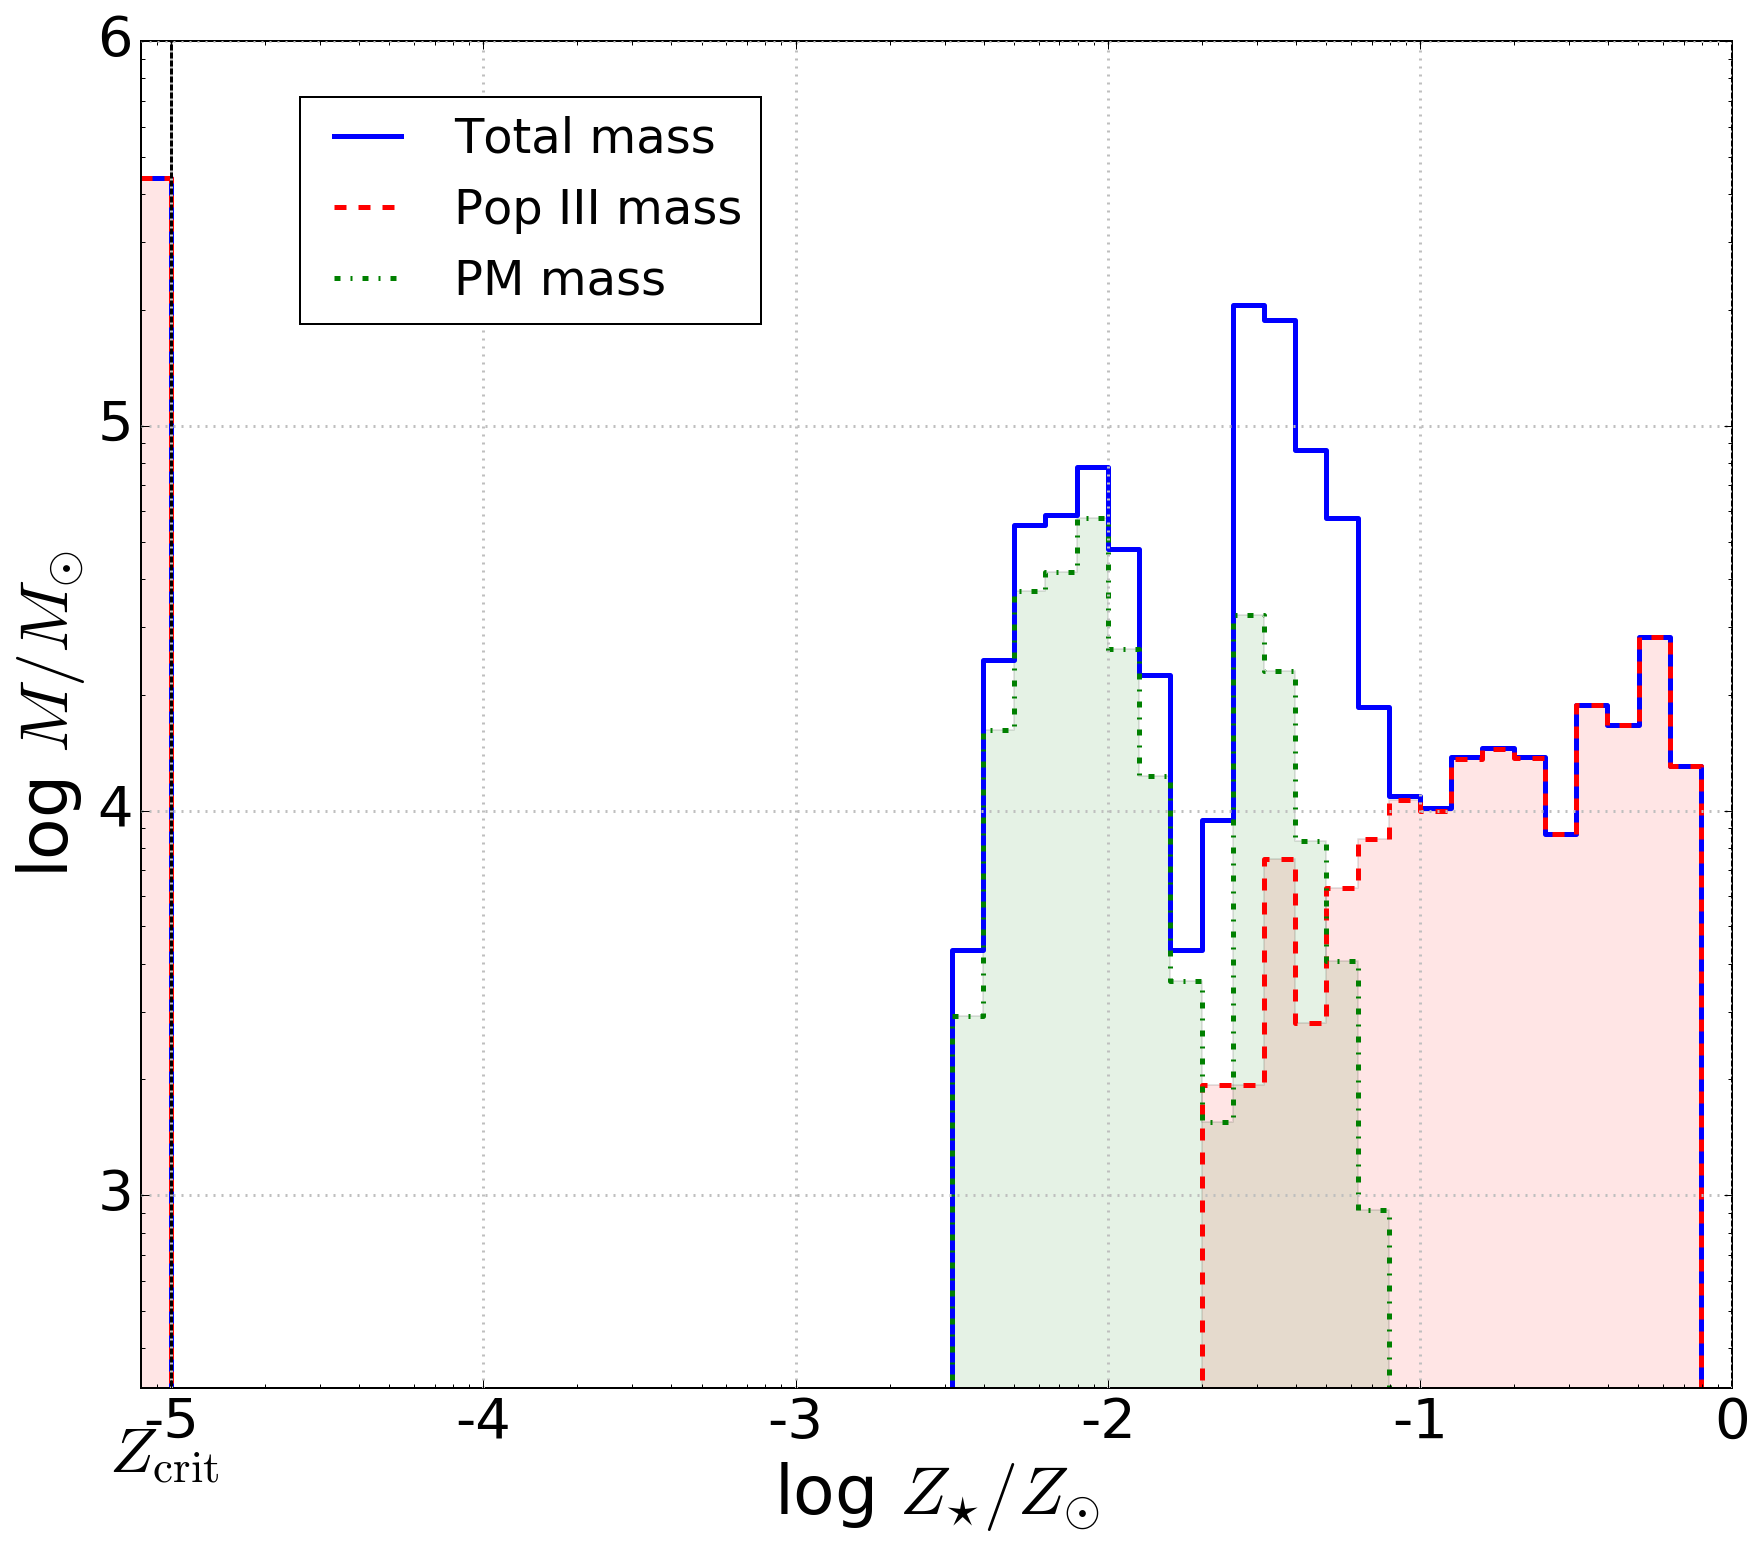

In [21]:
# With blocky transitions
 

fig = plt.figure()
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)
custom_formatter = FuncFormatter(formatter)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([8*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M/M_{\odot}$', size=axLabelSize)

axHist.plot(newx,tsm2,'b-',  linewidth = 2.5)
axHist.plot(newx,psm2, 'r--', linewidth = 2.5 )
axHist.plot(newx,primsm2,'g-.', linewidth = 2.5 )
#axHist.plot(xrange4[1:numBins],zsm,'m:*', linewidth = 2.0 )
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)
axHist.fill_between(newx, 0, psm2, facecolor='r', alpha=0.1)
axHist.fill_between(newx, 0, primsm2, facecolor='g', alpha=0.1)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate(r"$Z_{\rm crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.79), fontsize=24 )
plt.savefig("Hist_HaloData_z={:04.1f}SFRegion_fpol_20kpc.pdf".format(z),dpi=fig.dpi,bbox_inches='tight')
plt.show()

In [22]:
# Pop III fraction
subCrit = Zf < 1e-5
print("Class P3 to PopIII for halo ",np.sum(mass[subCrit])/np.sum(PPF * mass))
print("PopIII for halo ",1-(np.sum(fpol * mass))/(np.sum(mass)))
print("PM for halo ",(np.sum(fpol * mass * temp/Z))/(np.sum(mass)))


Class P3 to PopIII for halo  0.714159278452
PopIII for halo  0.425713252179
PM for halo  0.184798146622


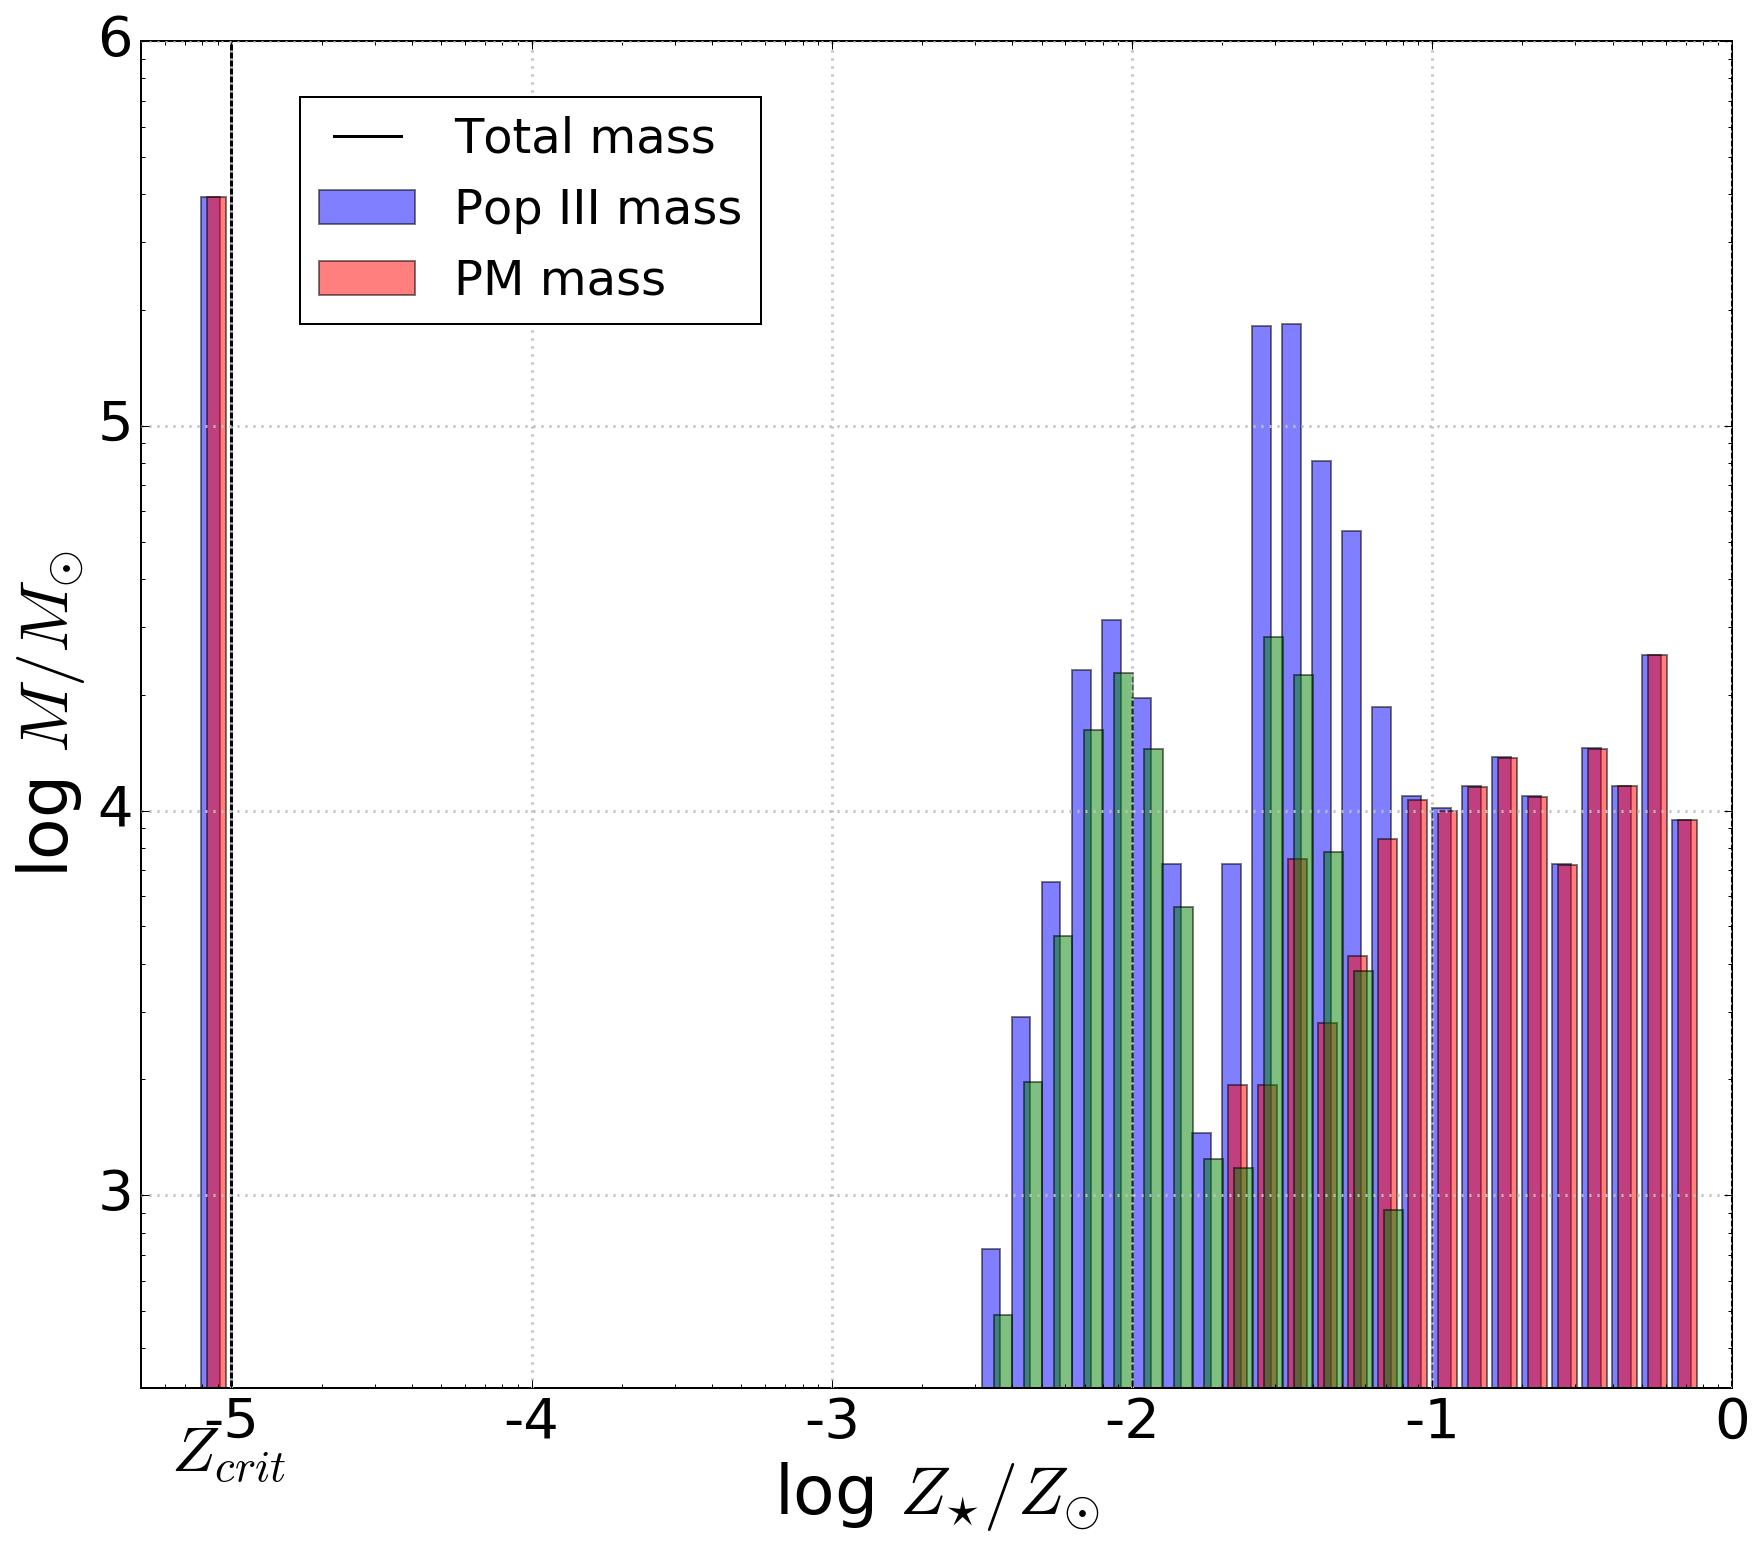

In [49]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)


axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([5*1e-6,1])
axHist.set_ylim([10**2.5,ymax])

axHist.set_xlabel("log $Z_{\star}/Z_{\odot}$", size=axLabelSize)
axHist.set_ylabel('log $M/M_{\odot}$', size=axLabelSize)
widthNorm = 6.5
axHist.bar(xrange1[0:numBins-1],tsm,    color='b', width=xrange1[0:numBins-1]/widthNorm, log=True, alpha=0.5)
axHist.bar(xrange2[0:numBins-1],psm,    color='r', width=xrange2[0:numBins-1]/widthNorm, log=True, alpha=0.5)
axHist.bar(xrange3[0:numBins-1],primsm, color='g', width=xrange3[0:numBins-1]/widthNorm, log=True, alpha=0.5)
axHist.xaxis.set_major_formatter(custom_formatter)
axHist.yaxis.set_major_formatter(custom_formatter)

axHist.plot([1e-5,1e-5],[axHist.get_ylim()[0],axHist.get_ylim()[1]],'k-',  linewidth = 1.5)
axHist.annotate("$Z_{crit}$",size=32,
            xy=(1e-5, 10**2.5), xycoords='data',
            xytext=(10**-5.2, 10**2.28), textcoords='data',
            #arrowprops=dict(arrowstyle="",
            #                connectionstyle="arc3"),
            )

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total mass','Pop III mass',r'PM mass'],
              loc=(0.1,0.79), fontsize=24 )

plt.savefig("Hist_HaloData_z="+str(z)+"SFRegion_bar.pdf")
plt.show()

In [24]:
popiii = Zf >= 10**-1.1 # Use -1.7 for z16, -1.2 for z8
print("Pristine fraction in range",
    1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))

Pristine fraction in range 0.994977607171


In [25]:
# z=8 halo -- highly polluted stars
popiii = (10**-1.8 < Zf) & (Zf < 10**-1.2)
# ## z=16 halo -- highly polluted stars
# popiii = (10**-2.7 <= Zf) & (Zf < 10**-1.6)
print("Pristine in range",
 1-(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))
print("Polluted ",(np.sum(fpol[popiii] * mass[popiii]))/(np.sum(mass[popiii])))


Pristine in range 0.0370017395085
Polluted  0.962998260492


In [34]:
# PM
popiii = (10**-1.8 < Zf) & (Zf < 10**-1.2)
# popiii = (10**-2.5 <= Zf) & (Zf < 10**-2)
print("PM in range",
 (np.sum(fpol[popiii] * mass[popiii] * temp[popiii]/Z[popiii]))/(np.sum(mass[popiii])))

PM in range 0.131757580158


In [35]:
popiii = (10**-2.7 < Zf) & (Zf <= 10**-1.8)
print("PM in lower range",
 (np.sum(fpol[popiii] * mass[popiii] * temp[popiii]/Z[popiii]))/(np.sum(mass[popiii])))

PM in lower range 0.665527609669


In [36]:
print("Halo AVE mass=",np.sum(mass)/len(mass))
print("Halo Median mass=",np.median(mass))
print("Halo Max mass=",np.max(mass))
print("")
print("Halo total mass=",np.sum(mass))
print("Total Pop III mass=",np.sum(PPF * mass))
print("PopIII/Classical PopIII=",np.sum(PPF * mass)/np.sum(mass[Zf < 1e-5]))
print("Classic/PopIII=",np.sum(mass[Zf < 1e-5])/np.sum(PPF * mass))
print("Mass weighted ave Z =",np.sum(Zf * fpol * mass)/np.sum(mass))
print("PM in halo",(np.sum(fpol* mass * temp/Z))/(np.sum(fpol*mass)))

Halo AVE mass= 734.431587488
Halo Median mass= 725.591358151
Halo Max mass= 1451.1827163

Halo total mass= 1453440.11164
Total Pop III mass= 618748.716773
PopIII/Classical PopIII= 1.40024785811
Classic/PopIII= 0.714159278452
Mass weighted ave Z = 0.0153349477565
PM in halo 0.321787238384


In [193]:
Zf[Zf>=1],PZf[PZf>=1]

(array([], dtype=float64), array([], dtype=float64))

In [194]:
Z[Z>1e-1],Zf[Zf>1e-1]

(array([], dtype=float64),
 array([ 0.62633701,  0.43033668,  0.47020803,  0.34258385,  0.66584538,
         0.52263902,  0.60323285,  0.34667058,  0.46980992,  0.65177533,
         0.67217565,  0.13491345,  0.18063914,  0.48129721,  0.41697252,
         0.49305812,  0.13460336,  0.17169009,  0.44468218,  0.15477742,
         0.20149804,  0.41133237,  0.16817972,  0.40632474,  0.19465352,
         0.58653308,  0.32162347,  0.53561615,  0.10285603,  0.24783775,
         0.62564245,  0.51693883,  0.66903856,  0.21340285,  0.12097045,
         0.11234659,  0.52679995,  0.26599492,  0.61897867,  0.20326786,
         0.62076691,  0.31567059,  0.49202922,  0.27708082,  0.60811934,
         0.50273916,  0.12321788,  0.39876998,  0.55522202,  0.57320655]))